<a href="https://colab.research.google.com/github/ewattudo/gis/blob/main/PS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up Code & Import Files
Run this for data and setup code.



## Set Up Code

In [30]:
!pip install geopandas==1.0.1
import pandas as pd
import urllib.request
import numpy as np

In [28]:
#plotly
import plotly.express as px #a quick simple one
import plotly.graph_objects as go #can get convoluted

In [19]:
%%capture
!pip install geopandas==1.0.1
!pip install mapclassify

In [20]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [21]:
#!python --version
gpd.__version__

'1.0.1'

In [22]:
!pip install mapclassify
import mapclassify #need for thematic map classification

# Map Data Import and Merge

## World Map Import

In [ ]:
#I uploaded a different world map shapfile, but I like htis one better.
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')

### Getting to Know World Data

In [ ]:
#I need to familiarize myself with the data for the merge. First I want to see how the country names are displayed, so I can merge based on country name.
Countries.head(3)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."


In [ ]:
#WB_Name looks good, It's closest to the names I have in my files. I need to see a list of all the names in the file to see how they are presented.
print(Countries.WB_NAME.unique())

['Indonesia' 'Malaysia' 'Chile' 'Bolivia' 'Peru' 'Argentina' 'Cyprus'
 'India' 'China' 'Israel' 'West Bank and Gaza' 'Lebanon' 'Ethiopia'
 'South Sudan' 'Somalia' 'Kenya' 'Pakistan' 'Malawi' 'Tanzania'
 'Syrian Arab Republic' 'France' 'Suriname' 'Guyana' 'Korea, Republic of'
 "Korea, Democratic People's Republic of" 'Morocco' 'Costa Rica'
 'Nicaragua' 'Congo, Rep. of' 'Congo, Democratic Republic of' 'Bhutan'
 'Ukraine' 'Belarus' 'Namibia' 'South Africa' 'Saint-Martin (Fr.)'
 'Sint Maarten (Neth.)' 'Oman' 'Uzbekistan' 'Kazakhstan' 'Tajikistan'
 'Lithuania' 'Brazil' 'Uruguay' 'Mongolia' 'Russian Federation'
 'Czech Republic' 'Germany' 'Estonia' 'Latvia' 'Norway' 'Sweden' 'Finland'
 'Vietnam' 'Cambodia' 'Luxembourg' 'United Arab Emirates' 'Belgium'
 'Georgia' 'North Macedonia' 'Albania' 'Azerbaijan' 'Kosovo' 'Turkey'
 'Spain' "Lao People's Democratic Republic" 'Kyrgyz Republic' 'Armenia'
 'Denmark' 'Libya' 'Tunisia' 'Romania' 'Hungary' 'Slovak Republic'
 'Poland' 'Ireland' 'United Kingdom

In [47]:
#renaming for merge
Countries = Countries.rename(columns={'WB_NAME':'Country'})

### Importing World Application Data

In [36]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/gis/refs/heads/main/World%20AC.csv", "WorldApp.csv")

('WorldApp.csv', <http.client.HTTPMessage at 0x7a6c39127070>)

In [37]:
WorldApp = pd.read_csv('WorldApp.csv')

### Merging World Map Data

In [48]:
#Merging World Map with World AC Data
WORLDACMAP = pd.merge(Countries, WorldApp, on='Country',how='outer',indicator=True)
WORLDACMAP[['Country','2022-2023','2023-2024','2024-2025','Grand Total','_merge']]

,Country,2022-2023,2023-2024,2024-2025,Grand Total,_merge
0,Afghanistan,NaN,NaN,NaN,NaN,left_only
1,Albania,NaN,NaN,NaN,NaN,left_only
2,Algeria,NaN,NaN,NaN,NaN,left_only
3,American Samoa (US),NaN,NaN,NaN,NaN,left_only
4,Andorra,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...
246,West Bank and Gaza,NaN,NaN,NaN,NaN,left_only
247,"Yemen, Republic of",NaN,NaN,NaN,NaN,left_only
248,Zambia,NaN,NaN,NaN,NaN,left_only
249,Zimbabwe,NaN,NaN,NaN,NaN,left_only


In [49]:
#Need to get rid of the NaNs
WORLDACMAP['2022-2023'] = WORLDACMAP['2022-2023'].fillna(0)
WORLDACMAP['2023-2024'] = WORLDACMAP['2023-2024'].fillna(0)
WORLDACMAP['2024-2025'] = WORLDACMAP['2024-2025'].fillna(0)
WORLDACMAP['Grand Total'] = WORLDACMAP['Grand Total'].fillna(0)

## US Map Import

In [ ]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close() #just unzipping

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

## Getting to Know US Data

In [ ]:
#I need to familiarize myself with the data for the merge. First I want to see how the State names are displayed, so I can merge based on state name.
US.head(1)

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."


In [ ]:
#Same as for World. Name field looks like state names. I'll merge based on the these.
print(US.NAME.unique())

['Mississippi' 'North Carolina' 'Oklahoma' 'Virginia' 'West Virginia'
 'Louisiana' 'Michigan' 'Massachusetts' 'Idaho' 'Florida' 'Nebraska'
 'Washington' 'New Mexico' 'Puerto Rico' 'South Dakota' 'Texas'
 'California' 'Alabama' 'Georgia' 'Pennsylvania' 'Missouri' 'Colorado'
 'Utah' 'Tennessee' 'Wyoming' 'New York' 'Kansas' 'Alaska' 'Nevada'
 'Illinois' 'Vermont' 'Montana' 'Iowa' 'South Carolina' 'New Hampshire'
 'Arizona' 'District of Columbia' 'American Samoa'
 'United States Virgin Islands' 'New Jersey' 'Maryland' 'Maine' 'Hawaii'
 'Delaware' 'Guam' 'Commonwealth of the Northern Mariana Islands'
 'Rhode Island' 'Kentucky' 'Ohio' 'Wisconsin' 'Oregon' 'North Dakota'
 'Arkansas' 'Indiana' 'Minnesota' 'Connecticut']


# Visualizations

## World Data

### World Tree Map

In [46]:
fig = px.treemap(WorldApp, path=[px.Constant("Accepted Offers by Country"), 'Continent', 'Country'], values='Grand Total',
                  color='AC/App%', hover_data=['Country'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(WorldApp['AC/App%'], weights=WorldApp['Grand Total']))
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:687: UserWarning:

Not enough unique values in array to form 17 classes. Setting k to 10.



<Axes: >

[]

[]

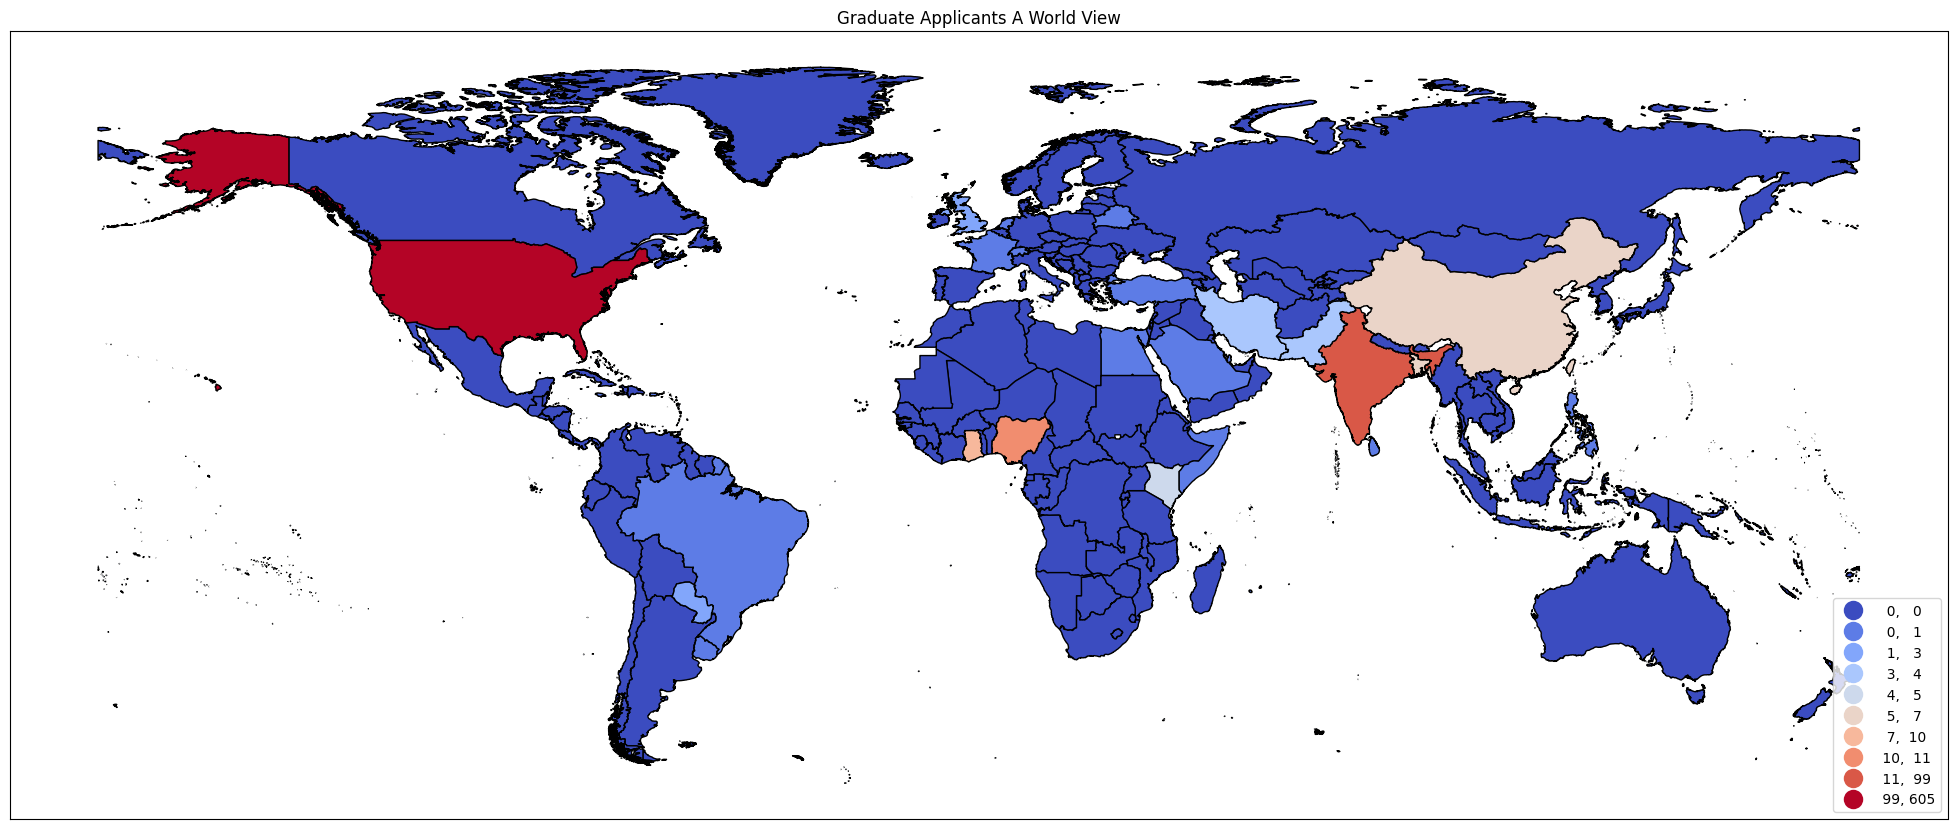

In [50]:
fig, ax = plt.subplots(1, figsize=(25,75))
WORLDACMAP.plot(ax=ax,column='Grand Total',legend=True,cmap='coolwarm',
          scheme='natural_breaks',k=17, edgecolor='black',linewidth=1,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
leg1 = ax.get_legend()
ax.title.set_text("Graduate Applicants A World View")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks